<a href="https://www.kaggle.com/code/navroopgill/health-insurance-cost-analysis?scriptVersionId=94506092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Problem statement: 

Analyze the medical insurance dataset with the primary objective to identify-

- The factors significant in predicting the reason for hospitalization for different regions.
- How well some variables like BMI, sex, number of children, smoking, describe the hospitalization charges.


# Column Profiling:

- age : age of primary beneficiary
- sex : insurance contractor gender: female, male
- bmi : Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children : Number of children covered by health insurance / Number of dependents
- smoker : Smoking
- region : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges : Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis
    We define some helper functions for the EDA of the dataset.

In [2]:
def missing_values(data):
    '''
    This function computes the number and percentages of null values
    for each feature.
    Parameters:
    data (pandas.DataFrame): Data under analysis
    Returns:
    A pandas.DataFrame with Null Counts and Percentages for each feature.
    '''
    null_counts = data.isna().sum()
    print(f"# Data points = {data.shape[0]}")
    return pd.DataFrame(
    {
    'Null Counts' : null_counts,
    'Null Percentages' : null_counts/data.shape[0]
    }
    )

In [3]:
def remove_outliers(data, features, method='iqr'):
    '''
    Removes outliers based on requested method.
    Parameters:
    data (pandas.DataFrame): Data under analysis
    features (list): List of features for outlier removal
    method (string): Accepts two values "iqr", "z-score"
    Returns:
    data (pandas.Series): Cleaned Data
    outliers (pandas.Series):
    '''
    intial_shape = data.shape
    outliers = pd.DataFrame()
    if method == 'iqr':
            for f in features:
                q1 = data[f].quantile(0.25)
                q3 = data[f].quantile(0.75)
                iqr = q3-q1
                f_outliers = data.loc[(data[f]<q1-1.5*iqr) | (data[f]>q3+1.5*iqr)]
                outliers = outliers.append(f_outliers)
                data.drop(f_outliers.index, inplace=True)
    elif method == 'z-score':
        for f in features:
            mean = data[f].mean()
            std = data[f].std()
            f_outliers = data.loc[((data[f]-mean)/std<-3) | ((data[f]-mean)/std>3)]
            outliers = outliers.append(f_outliers)
            data.drop(f_outliers.index, inplace=True)
    print(f'{outliers.shape[0]*100/intial_shape[0]}% data detected as outlier.')
    return data, outliers



In [4]:
def univariate_analysis(data, features, type_of_feature, width = 16, height =9):
    '''
    This function helps to perform univariate analysis by
    plotting relevant plots for different types of features.
    For Categorical features: we plot Count Plot and Pie Chart
    For Continuous : we plot Boxplot and Histogram
    Parameters:
    data (pd.DataFrame): Data under analysis
    features (list): List of continuous/categorical features
    type_of_feature (string): continuous or categorical
    width (int): width of 1 axes
    height (int): height of 1 axes
    Returns:
    None
    '''
    n_features = len(features)
    figsize = (width, height*n_features)
    fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize,constrained_layout=True)
    if n_features == 1:
        ax = [ax]
    if type_of_feature == 'continuous':
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Boxplot for {f}")
            sns.boxplot(y = data[f], ax=ax[i][0])
            ax[i][0].set_ylabel(f)
            sns.histplot(data[f], ax=ax[i][1], kde=True)
            ax[i][1].axvline(data[f].mean(), color='r', linestyle='--', label="Mean")
            ax[i][1].axvline(data[f].median(), color='g', linestyle='-',label="Median")
            ax[i][1].axvline(data[f].mode()[0], color='royalblue', linestyle='--',label="Mode")
            ax[i][1].set_title(f"Histplot for {f}")
            ax[i][1].legend()
    elif type_of_feature == 'categorical':
        for i in range(n_features):
            f = features[i]
            counts = df[f].value_counts()
            ax[i][0].set_title(f"Count Plot for {f}")
            counts.plot.bar(ax=ax[i][0])
            ax[i][0].set_ylabel("Counts")
            ax[i][0].set_xlabel(f)
            ax[i][1].set_title(f"Pie chart for {f}")
            counts.plot.pie(autopct='%0.0f%%', ax=ax[i][1])
    fig.suptitle(f"Univariate analysis of {type_of_feature} features",fontweight="bold")
    plt.show()

In [5]:
def bivariate_analysis(data, features, type_of_feature, group_by, width = 16,height = 9):
    '''
    This function helps to perform biivariate analysis by
    plotting relevant plots for different types of features across
    a particular categorical feature.
    For Categorical features: Count Plot with hue as "group_by"
    For Continuous : Violinplot with x axis as "group_by" and

    kdeplot with hue as "group_by"

    Parameters:
    data (pd.DataFrame): Data under analysis
    features (list): List of continuous/categorical features
    type_of_feature (string): continuous or categorical
    group_by (string): Feature Name to group by plots with
    width (int): width of 1 axes
    height (int): height of 1 axes
    Returns:
    None
    '''
    n_features = len(features)
    figsize = (width, height*n_features)
    if type_of_feature == 'continuous':
        fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize,constrained_layout=True)
        if n_features == 1:
            ax = [ax]
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Boxplot for {f} by {group_by}")
            sns.violinplot(data=data, y=f, x=group_by, ax=ax[i][0])
            ax[i][0].set_ylabel(f)
            sns.kdeplot(data=data, x=f, hue=group_by, ax=ax[i][1])
            ax[i][1].set_title(f"Kdeplot for {f} by {group_by}")
    elif type_of_feature == 'categorical':
        fig, ax = plt.subplots(nrows=n_features, ncols=2, figsize=figsize)
        if n_features == 1:
            ax = [ax]
        for i in range(n_features):
            f = features[i]
            ax[i][0].set_title(f"Count Plot for {f} by {group_by}")
            sns.countplot(data=data, x=f, hue=group_by, ax=ax[i][0])
            ax[i][0].set_ylabel("Counts")
            ax[i][0].set_xlabel(f)
            ax[i][1].set_title(f"Count Plot for {group_by} by {f}")
            sns.countplot(data=data, x=group_by, hue=f, ax=ax[i][1])
            ax[i][1].set_ylabel("Counts")
            ax[i][1].set_xlabel(group_by)
    fig.suptitle(f"Bivariate analysis of {type_of_feature} features",fontweight="bold")
    plt.show()

In [6]:
df=pd.read_csv("../input/insurance1/insurance.csv")

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
print(f"Our dataset captures information about a total of {df.shape[0]} unique patients, with each patient record being described by {df.shape[1]} different features.")

Our dataset captures information about a total of 1338 unique patients, with each patient record being described by 7 different features.


Observation:
- We have 7 features and 1338 patient records.
- There are no null values in the dataset and it includes:
    - 3 categorical (numerical) variables: sex, smoker, region
    - 2 discrete variables: children and age
    - 2 continuous variables: charges, bmi

# Non-Graphical Analysis



In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Observation:
- Patient age varies from 18 years to 64 years with mean of 39.2 years.
- BMI values range from 15.96 to 53.13 with mean value of 30.663
- Hospital charges range from 1121 to 63770 with a mean value of 13270.The difference b/w mean and 50% suggests presence of outliers for this variable.
- Max number of children is 5.
- Sex and Smoker with 2 unique values each.

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

The number of female and male patients is approx same in our dataset.

In [12]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Majority of the patients in the dataset are non-smokers.

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The patient population is approx same across the four regions with Southeast region being the highest. 

In [14]:
# Let's list out categorical and conitnuous features separately.
categorical_cols=['sex',"smoker","children",'region']
continuous_cols = ['bmi','charges',"age"]


We try to visualize patterns in data using helper functions we defined earlier for graphical analysis.

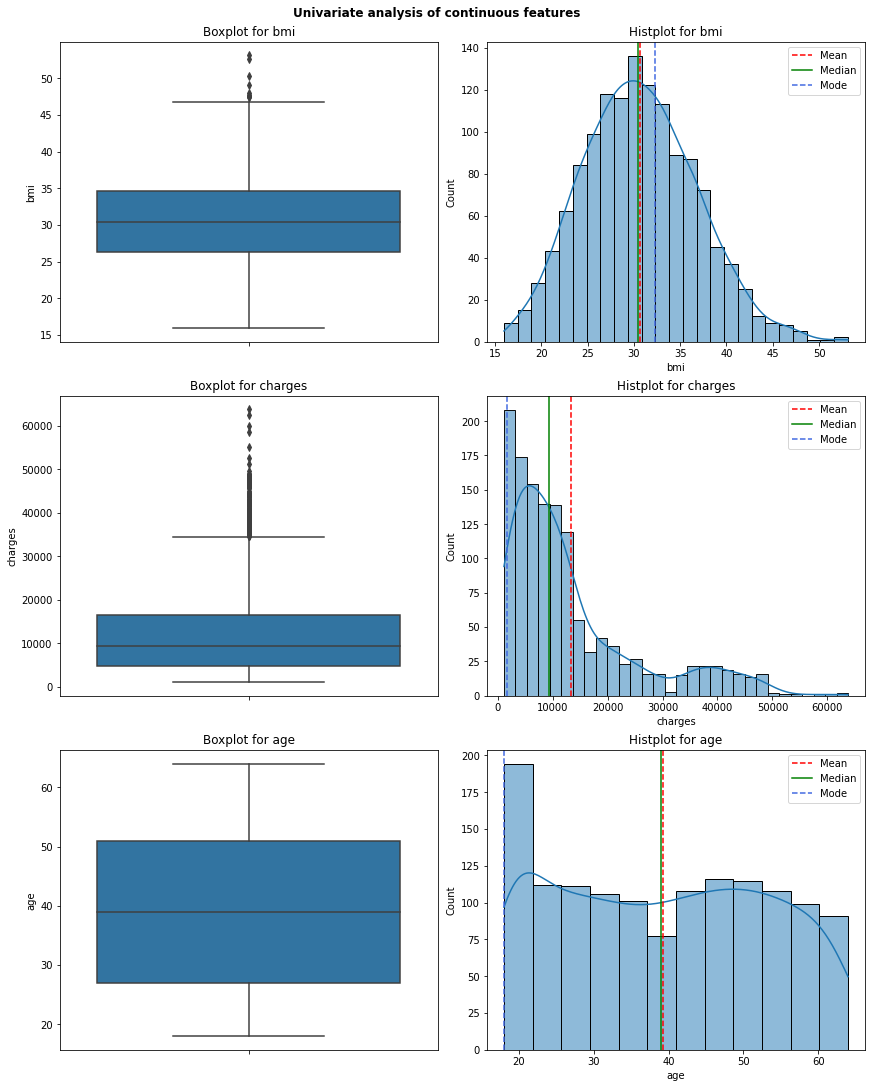

In [15]:
# Analyzing Distributions of Continuous features, looking for outliers
univariate_analysis(data=df,features=continuous_cols,type_of_feature='continuous', width = 12, height = 5)

Observations:

- The distributions of the BMI is approximately normal with a slight right skew. The mean and median are almost equal with mode to the left. We observe some outliers in the boxplot for bmi.
- The distributions of the hospital charges is log normal. We observe some outliers.
- The distributions of patient age is approximately uniform.

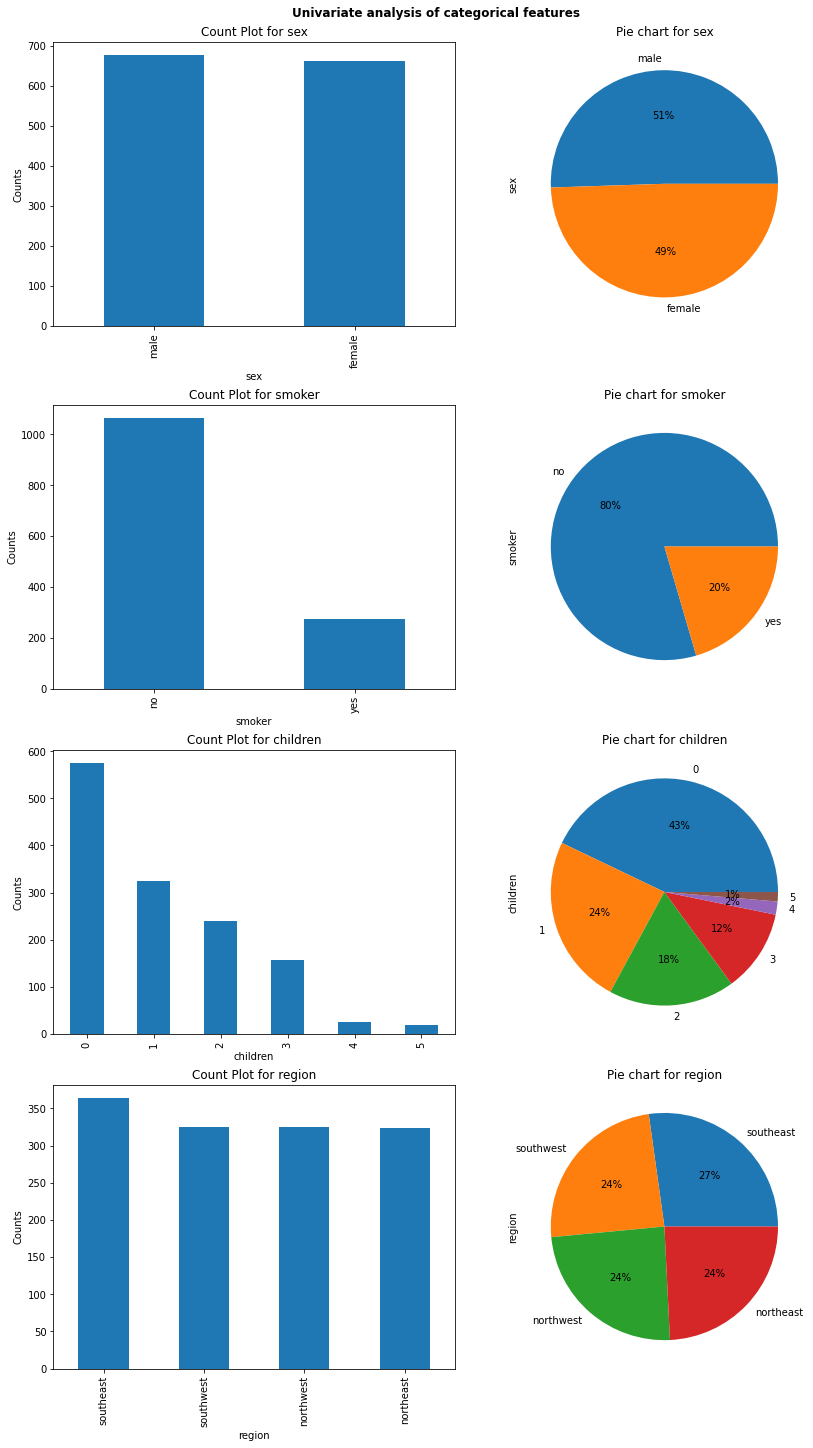

In [16]:
# Analyzing Distributions of Categorical features- 
univariate_analysis(data=df, features=categorical_cols,type_of_feature='categorical', width = 12, height = 5)

- 51% of the patient population is male.
- 80% are non-smokers.
- 43% have no children, followed by 24% with 1 child and 18% with 2 children.
- Distribution across regions is approx same.

# Bivariate Analysis
We will try to establish a relation between the dependent and independent variable.

### Charges by Smoking

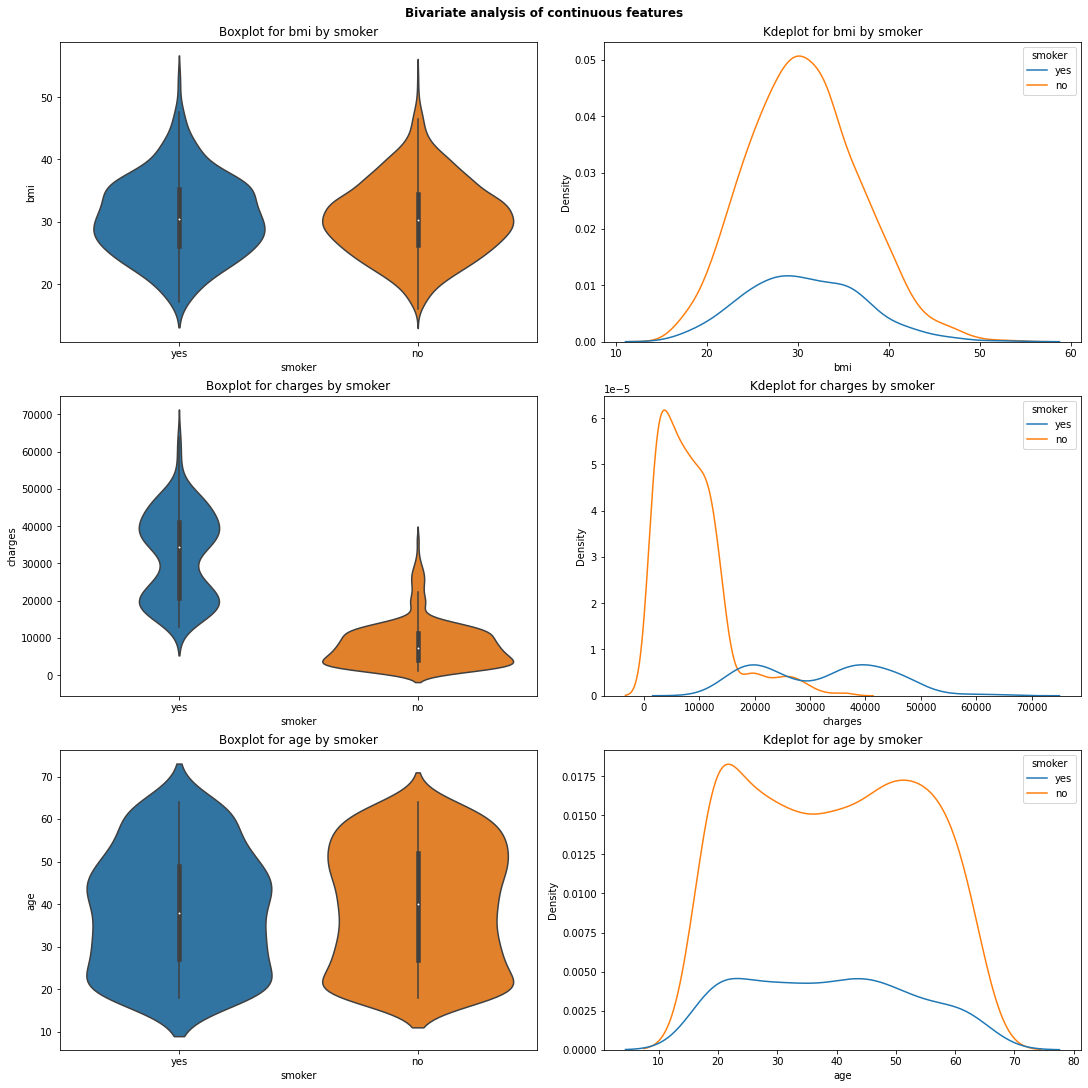

In [17]:
bivariate_analysis(data=df, features=continuous_cols,type_of_feature='continuous', group_by='smoker', width = 15, height = 5)

Analyis by smoking:

- 80% of the given sample population is non-smoking. 
- Mean bmi values are same for smokers and non-smokers. 
- max mean hospitalization charges for smokers are much higher(between 75,000- 100000) than non-smokers (less than 25000).
- no relationship between age and smoking. Distribution is almost uniform.

### Charges by Number of children/dependents

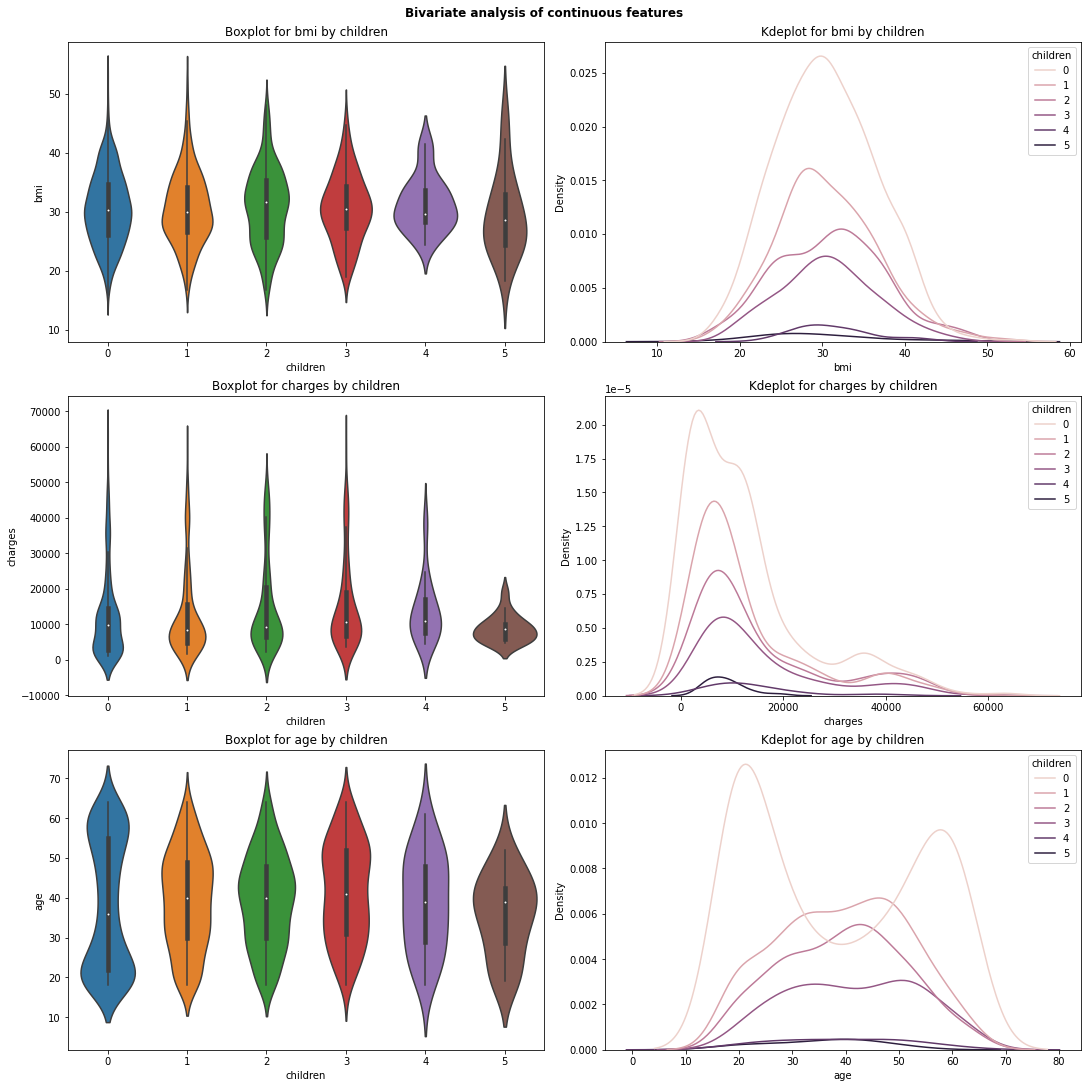

In [18]:
bivariate_analysis(data=df, features=continuous_cols,type_of_feature='continuous', group_by='children', width = 15, height = 5)

- The highest median BMI observed where the number of children is 2 and lowest for 5.
- Patient population with 4 and 5 number of children is almost equal and not very common.
- The median age is almost equal for patients with 1,2,3 number of children.

### Charges by region

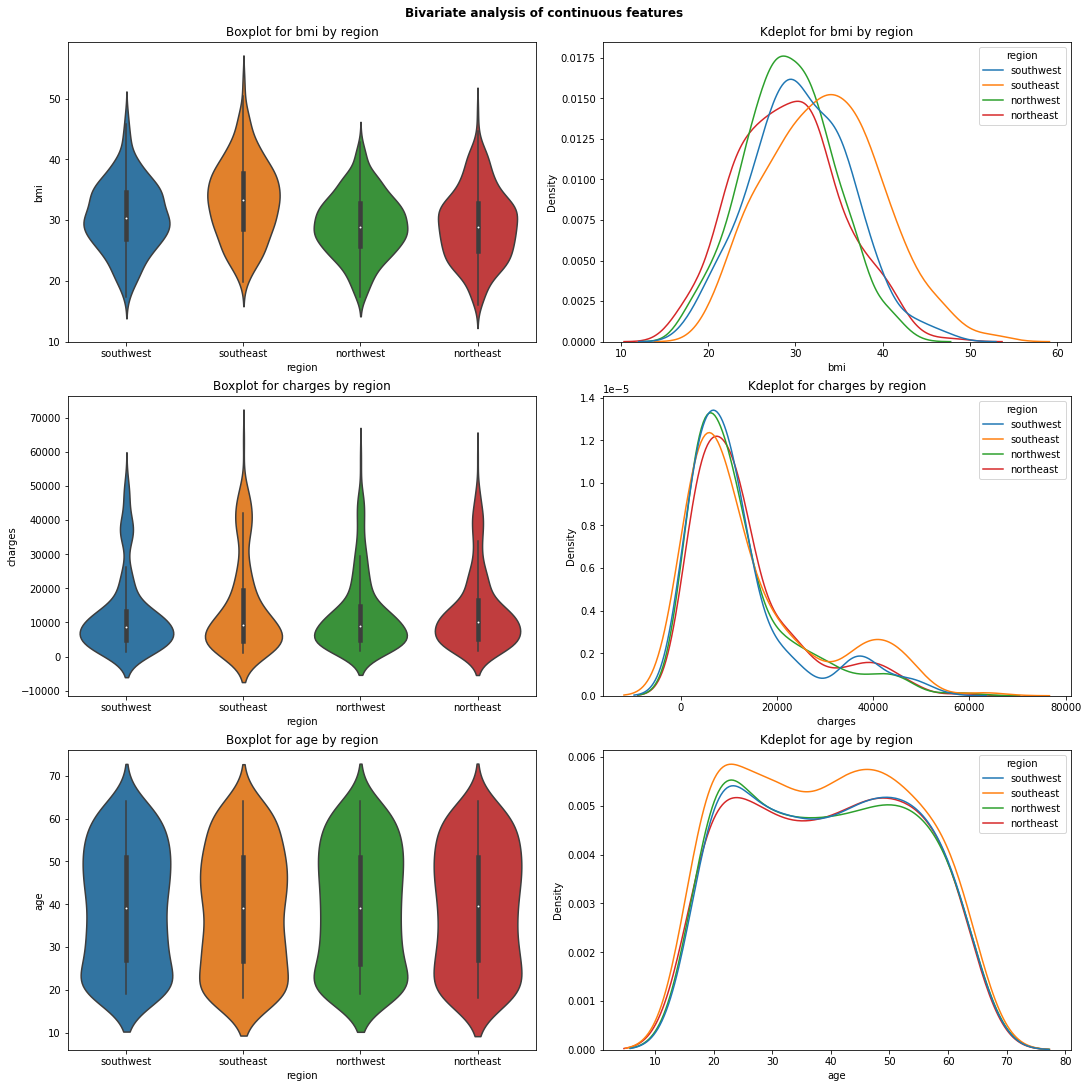

In [19]:
bivariate_analysis(data=df, features=continuous_cols,type_of_feature='continuous', group_by= 'region', width = 15, height = 5)

Analyis by region:

- All four regions have similar or uniform patient age distribution.
- bmi values highest for southeast region.

### Charges by gender

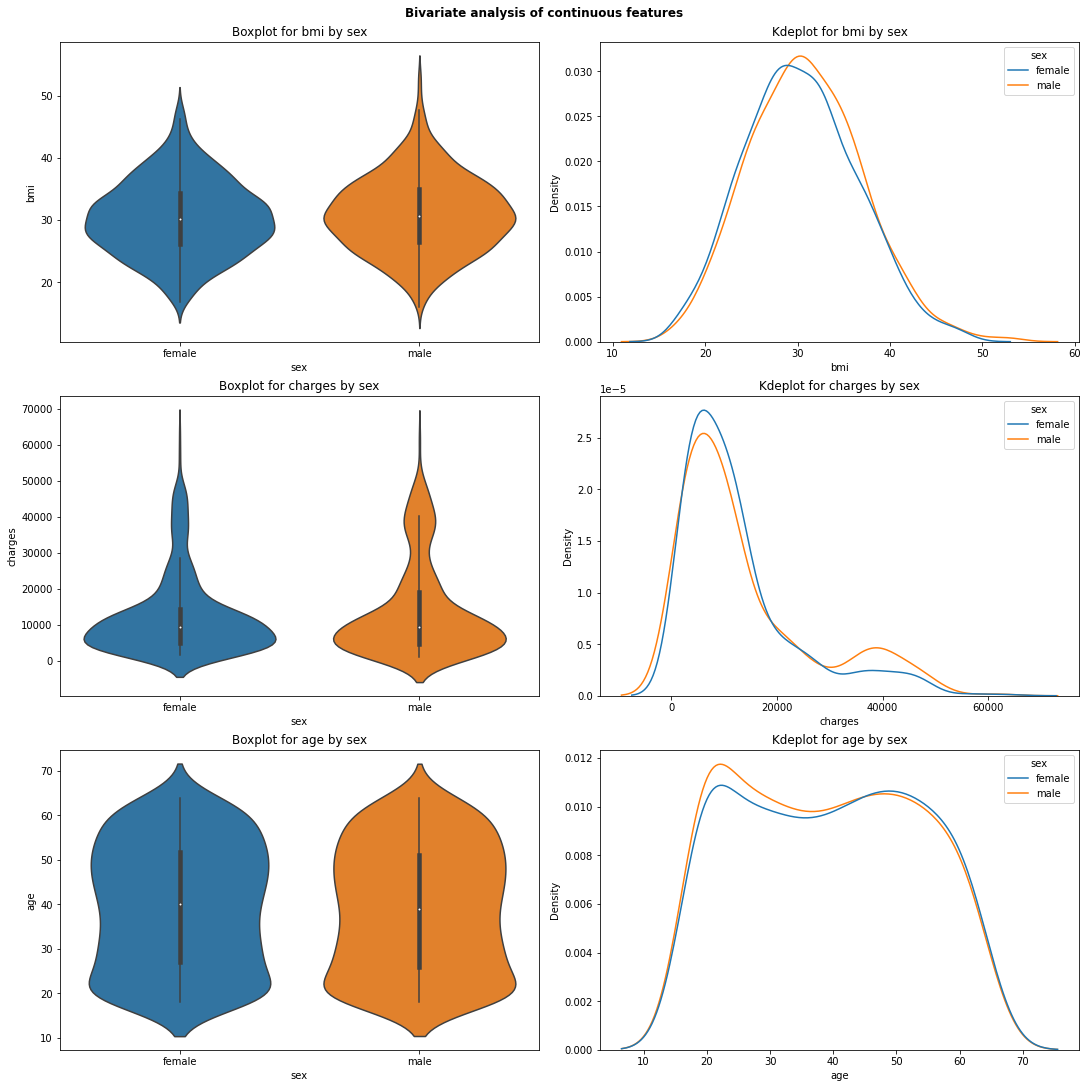

In [20]:
bivariate_analysis(data=df, features=continuous_cols,type_of_feature='continuous', group_by= 'sex', width = 15, height = 5)

- Female mean age is more than male, but the age group spread is higher in the case of males.
- Both the sexes have approx equal BMI with males having a slightly higher average BMI.

### Analysis of charges by gender, smoking status and region:

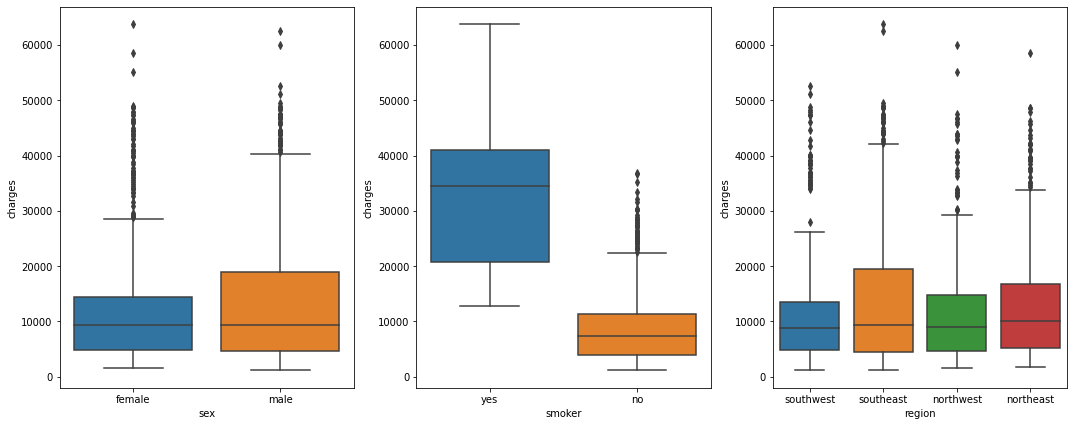

In [21]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(x=j, y='charges',data=df)
    plt.tight_layout(pad=1)

- Outliers observed in charges for gender, non-smokers and all 4 regions.
- Median hospitalization charges for male and female patients is same.
- Median hospitalization charges for smoking patients are much higher ( 4 times) than the non-smoking patients.
- Median hospitalization charges is similar for all the regions but the 75th percentile value for southeast region is the highest(50,000).

We will confirm this using the statistical analysis.

In [22]:
remove_outliers(df,continuous_cols, method='iqr')


10.986547085201794% data detected as outlier.


(      age     sex     bmi  children smoker     region      charges
 0      19  female  27.900         0    yes  southwest  16884.92400
 1      18    male  33.770         1     no  southeast   1725.55230
 2      28    male  33.000         3     no  southeast   4449.46200
 3      33    male  22.705         0     no  northwest  21984.47061
 4      32    male  28.880         0     no  northwest   3866.85520
 ...   ...     ...     ...       ...    ...        ...          ...
 1333   50    male  30.970         3     no  northwest  10600.54830
 1334   18  female  31.920         0     no  northeast   2205.98080
 1335   18  female  36.850         0     no  southeast   1629.83350
 1336   21  female  25.800         0     no  southwest   2007.94500
 1337   61  female  29.070         0    yes  northwest  29141.36030
 
 [1191 rows x 7 columns],
       age     sex     bmi  children smoker     region      charges
 116    58    male  49.060         0     no  southeast  11381.32540
 286    46  female  

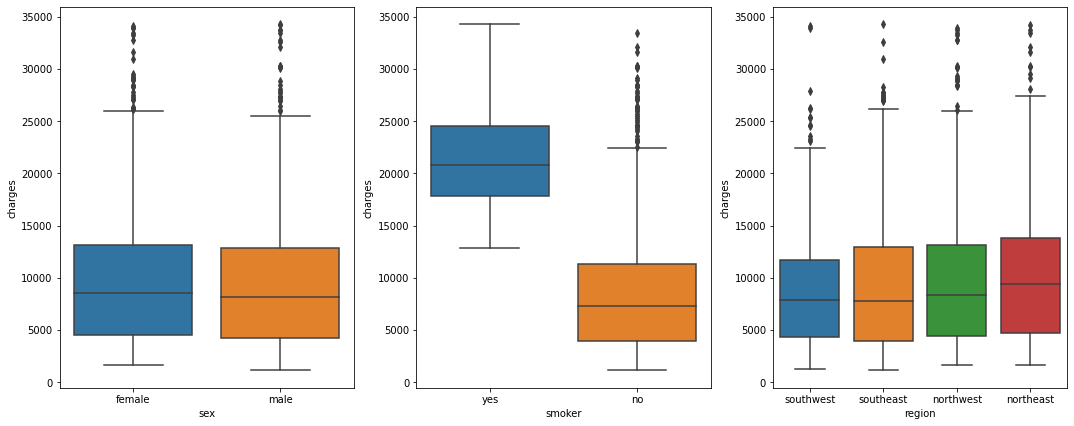

In [23]:
plt.figure(figsize=(15,6))
for i,j in enumerate(list(df.select_dtypes('object').columns)):
    plt.subplot(1,3,i+1)
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(x=j, y='charges',data=df)
    plt.tight_layout(pad=1)

Observations after outlier removal-

-There is some improvement in the outliers for the 'sex' feature. We observe that the median charges for female patients are now slightly higher than male patients.
-The median charges/claims for smoker patients have reduced to 19K after outlier removal.

# Multivariate Analysis

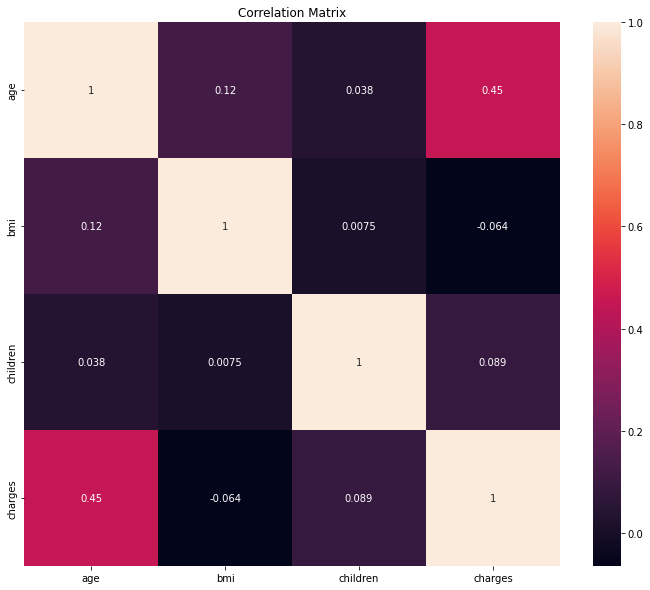

In [24]:
# Checking for correlation between the features

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

We observe positive correlation between the following 2 variables-

- Age and Hospitalization charges
- Positive correlation between BMI and Age
- Number of children and hospitalization charges


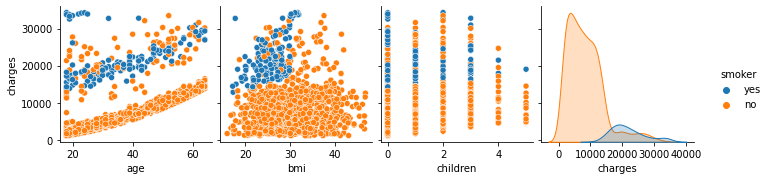

In [25]:
sns.pairplot(df,hue='smoker',y_vars=['charges'])
plt.show()

- Age and charges have almost linear relationship with charges increasing with increase in age.
- Smokers population have to incur higher medical costs.

<AxesSubplot:xlabel='age', ylabel='charges'>

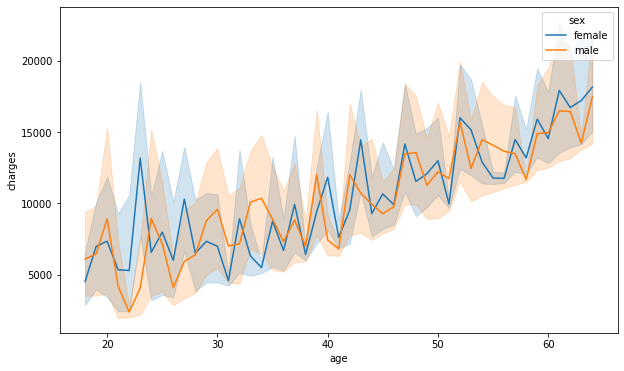

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='charges',hue='sex',data=df)

Female in the age_group of 23-25 yrs and 42-45 yrs have high hospitalization charges compared to men.

<AxesSubplot:xlabel='age_bins', ylabel='charges'>

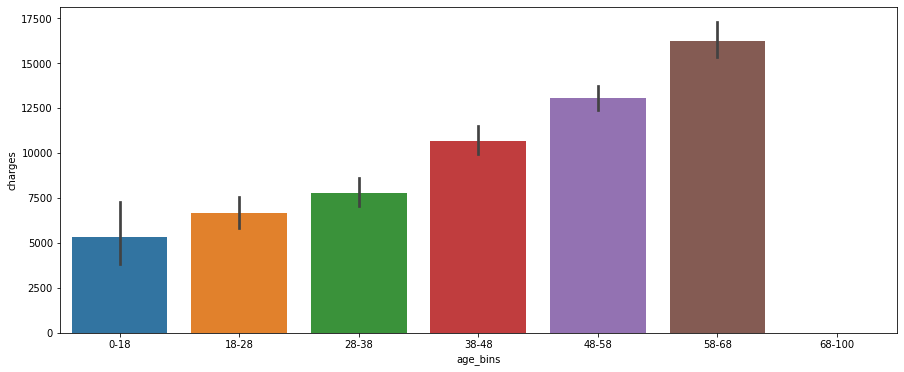

In [27]:
# Checking charges/medical costs by Age-Bin
plt.figure(figsize=(15,6))
age_bins=[0,18,28,38,48,58,68,100]
label=['0-18','18-28','28-38','38-48','48-58','58-68','68-100']
df["age_bins"]=pd.cut(x=df['age'],bins=age_bins,labels=label)
sns.barplot(x='age_bins',y='charges',data=df)

<AxesSubplot:ylabel='age_bins'>

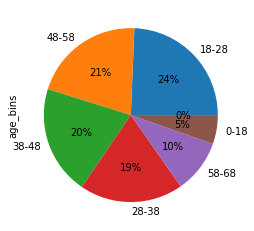

In [28]:

# Distribution of patient age.

counts = df['age_bins'].value_counts()

counts.plot.pie(autopct='%0.0f%%')

- 24% of patient population is in the age bracket of 18-28 yrs, followed by 48-58 yrs(21 yrs) and 38-48 yrs (20%). 
- The hospitalization charges increase with increase in the age and is maximum for the age group of 58-68 years.



# Hypothesis Testing
- We will use statistical tests to validate the observations from the graphical analysis above.

In [29]:
from scipy import stats
from scipy.stats import shapiro,levene,probplot

In [30]:
# Defining Helper Functions
def qqplot(data):
    '''
    This function plot qqplot for visual test of normality for input data
    Parameters:
    data : Data under analysis.
    Returns:
    None
    '''
    stats.probplot(data, dist="norm", plot=plt)
    plt.show()

In [31]:
def shapiro_wilk_test(data, alpha):
   
    '''
    This function does statistical test of normality for input data
    H0 : Data is normal
    Ha : Data is not normal
    Parameters:
    data : Data under analysis.
    alpha: Significance level.
    Returns:
    None
    '''
    w_stats, p_value = stats.shapiro(data)
    print("p-value:", p_value)
    if p_value > alpha :
        print("We do not reject the null hypothesis")
    else:
        print("Reject the Null Hypothesis")

In [32]:
def levene_test(sample1, sample2,center, alpha):
    '''
    This function does statistical test of assess the equality of variance
    between two different samples
    H0 : variance among groups is equal
    Ha : variance among groups is not equal
    Parameters:
    sample1, sample2 : Samples under analysis.
    center : {'mean', 'median', 'trimmed'},

    Which function of the data to use in the test.

    alpha: Significance level.
    Returns:
    None
    '''
    w_stats, p_value = stats.levene(sample1, sample2, center = center)
    print("p-value:", p_value)
    if p_value > alpha :
        print("We do not reject the null hypothesis")
    else:
        print("Reject the Null Hypothesis")

### HYPOTHESIS TESTING 1: Prove (or disprove) that smoking impacts the medical cost charges. 


- Null Hypothesis (H0) : Hospitalization of people who smoke is less than or same as those who do not smoke.

- Alternate Hypothesis (Ha) : Hospitalization of people who smoke is greater than those who do not smoke.

- Alpha (significance level)=0.05

- Test: 
    - The standard deviation of the population is unknown hence we will conduct the T-Test. 
    - Which will be  Right tailed as per our alternate hypothesis formulation (> sign in our Ha).The T-statistic that will cause us to reject the Null hypothesis will lie to the right of the t-test distribution.


- Before proceeding we will verify the assumptions for t-test:

• The samples are drawn from a Gaussian distribution.
• The size of each sample is approximately equal.
• The samples have the equal variance.


In [33]:
# gathering the 2 sample data to compare-

patients_smoke=df[df['smoker']=='yes']
patients_nonsmoke=df[df['smoker']=='no']

In [34]:
patients_smoke

,age,sex,bmi,children,smoker,region,charges,age_bins
0,19,female,27.900,0,yes,southwest,16884.92400,18-28
11,62,female,26.290,0,yes,southeast,27808.72510,58-68
52,48,male,28.000,1,yes,southwest,23568.27200,38-48
57,18,male,31.680,2,yes,southeast,34303.16720,0-18
58,53,female,22.880,1,yes,southeast,23244.79020,48-58
...,...,...,...,...,...,...,...,...
1307,32,male,28.120,4,yes,northwest,21472.47880,28-38
1308,25,female,30.200,0,yes,southwest,33900.65300,18-28
1314,30,female,23.655,3,yes,northwest,18765.87545,28-38
1321,62,male,26.695,0,yes,northeast,28101.33305,58-68


In [35]:
patients_nonsmoke

,age,sex,bmi,children,smoker,region,charges,age_bins
1,18,male,33.770,1,no,southeast,1725.55230,0-18
2,28,male,33.000,3,no,southeast,4449.46200,18-28
3,33,male,22.705,0,no,northwest,21984.47061,28-38
4,32,male,28.880,0,no,northwest,3866.85520,28-38
5,31,female,25.740,0,no,southeast,3756.62160,28-38
...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,48-58
1333,50,male,30.970,3,no,northwest,10600.54830,48-58
1334,18,female,31.920,0,no,northeast,2205.98080,0-18
1335,18,female,36.850,0,no,southeast,1629.83350,0-18


In [36]:
patients_smoke["charges"]

0       16884.92400
11      27808.72510
52      23568.27200
57      34303.16720
58      23244.79020
           ...     
1307    21472.47880
1308    33900.65300
1314    18765.87545
1321    28101.33305
1337    29141.36030
Name: charges, Length: 136, dtype: float64

In [37]:
patients_nonsmoke["charges"]

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1055, dtype: float64

####  Validating the t-test assumptions

In [38]:
# let's check size of each sample
patients_smoke.shape, patients_nonsmoke.shape

((136, 8), (1055, 8))

We observe the shapes of the two samples are not equal. Hence we need to do sampling of the non-smoker population.

In [39]:
patients_nonsmoke=patients_nonsmoke.sample(136)

In [40]:
patients_smoke.shape, patients_nonsmoke.shape

((136, 8), (136, 8))

### The two sample sizes are now equal and we can now proceed to check the other assumptions.

Text(0.5, 1.0, 'Hospitalization Charges Distribution for Smokers')

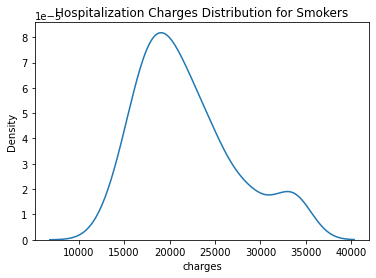

In [41]:
# Let's check the distributions first.
sns.kdeplot(x=patients_smoke["charges"])
plt.title("Hospitalization Charges Distribution for Smokers")

Text(0.5, 1.0, 'Hospitalization Charges Distribution for Non-Smokers')

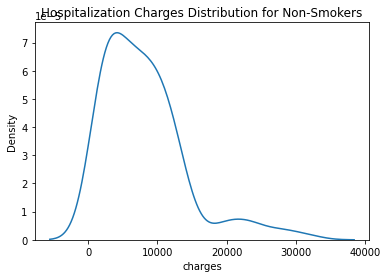

In [42]:
# Let's check the distributions first.
sns.kdeplot(x=patients_nonsmoke["charges"])
plt.title("Hospitalization Charges Distribution for Non-Smokers")

We can clearly see that the non-smoker distributions are right skewed and not normal. We will try to transform this to close
to Gaussian.

#### QQ PLOT to check for Normality

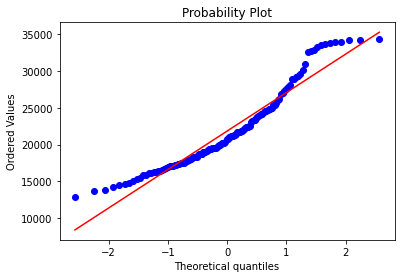

In [43]:
# Let's see how QQ plot is coming up
qqplot(patients_smoke["charges"])

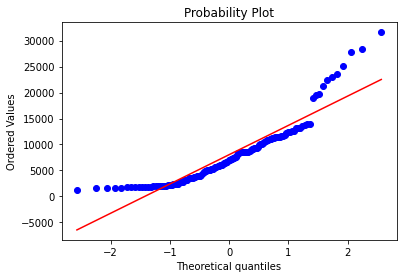

In [44]:
# Let's see how QQ plot is coming up
qqplot(patients_nonsmoke["charges"])

Observation:
    
- We can see from the q-q plot that the samples do not follow gaussian distribution. we will further confirm this using the Shapiro Wilk statistical test.

#### Shapiro Wilk statistical test for normality

In [45]:
# Null Hypothesis (H0): Sample follows the normal distribution.

shapiro_wilk_test(patients_smoke["charges"],0.05)

p-value: 2.4496512196492404e-06
Reject the Null Hypothesis


Shapiro Wilk Test confirms smokers distribution is not Gaussian dist as p-value is less than 0.05.

In [46]:
# Null Hypothesis (H0): Sample follows the normal distribution.

shapiro_wilk_test(patients_nonsmoke["charges"],0.05)

p-value: 3.5745142956677967e-10
Reject the Null Hypothesis


Shapiro Wilk Test confirms non-smokers distribution is not a Gaussian dist as p-value less than 0.05.

#### Transforming the distributions using Box-Cox transformation.

-0.6630313024872142


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


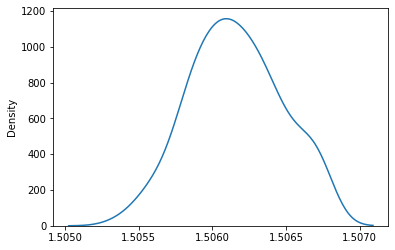

In [47]:
from scipy.stats import boxcox
#perform Box-Cox transformation on our non-smoker charges sample charges.
patients_smoke_tr, best_lambda = boxcox(patients_smoke["charges"]) 

#plot the distribution of the transformed data values
sns.distplot(patients_smoke_tr, hist=False, kde=True) 

#display optimal lambda value
print(best_lambda)

In [48]:
patients_smoke_tr

array([1.5058503 , 1.50651898, 1.50632126, 1.50674054, 1.50630374,
       1.50562321, 1.50592018, 1.50582123, 1.50617632, 1.50660922,
       1.50625675, 1.50574558, 1.50663554, 1.50591125, 1.50603721,
       1.50586841, 1.50669376, 1.50602688, 1.50615331, 1.50609992,
       1.50618433, 1.50571365, 1.50619226, 1.50616892, 1.50606762,
       1.50606238, 1.50589293, 1.50658531, 1.50537605, 1.50672447,
       1.5058688 , 1.50638789, 1.50587737, 1.50625201, 1.50579394,
       1.50623107, 1.50638806, 1.5063642 , 1.50551629, 1.50595171,
       1.50621167, 1.50565721, 1.50607341, 1.50559275, 1.50599846,
       1.50656388, 1.50644617, 1.50624095, 1.50606809, 1.50641256,
       1.50656076, 1.505944  , 1.50624534, 1.50668797, 1.50617526,
       1.50633394, 1.50569643, 1.50590323, 1.50642646, 1.50630711,
       1.50611284, 1.50669541, 1.50637791, 1.5064869 , 1.50582888,
       1.5060563 , 1.50596929, 1.50606936, 1.50629385, 1.50603212,
       1.50592754, 1.50597033, 1.50637057, 1.50618255, 1.50597

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

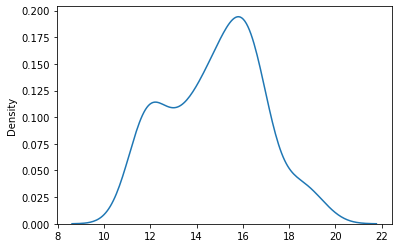

In [49]:
from scipy.stats import boxcox
#perform Box-Cox transformation on our non-smoker charges sample charges.
patients_nonsmoke_tr, best_lambda = boxcox(patients_nonsmoke["charges"]) 

#plot the distribution of the transformed data values
sns.distplot(patients_nonsmoke_tr, hist=False, kde=True) 


In [50]:
patients_nonsmoke_tr

array([14.27623777, 16.07853904, 18.27347306, 11.48258145, 16.6956863 ,
       10.89555107, 16.39580891, 15.88796894, 15.23017671, 14.67004155,
       15.62264362, 14.55060157, 16.42305097, 12.79249252, 16.6436371 ,
       15.10888684, 16.73004031, 11.63834377, 16.85399329, 13.5478048 ,
       14.93789402, 13.55147086, 13.62896801, 19.49279495, 16.99949064,
       18.7675952 , 14.38305063, 16.46247334, 12.28712653, 13.43661687,
       14.88253973, 12.11210287, 15.32089024, 16.40959442, 11.62310136,
       15.8296179 , 14.26525001, 12.18346025, 11.59559207, 16.43321164,
       15.08594673, 14.37005836, 12.38100136, 15.56344723, 15.90842108,
       11.48705215, 16.22803947, 14.16561101, 16.17115092, 14.34011145,
       16.51701004, 13.05168053, 14.89328522, 14.52911217, 12.45753412,
       15.82719922, 13.60083782, 15.65050586, 15.25541249, 15.68210994,
       15.76327999, 13.06357787, 15.62367201, 11.61761367, 13.10218314,
       16.94664914, 15.54467387, 15.45750094, 11.93813424, 16.08

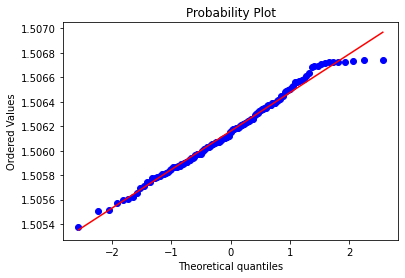

In [51]:
# Let's see how QQ plot is coming up
qqplot(patients_smoke_tr)

We can see that the distribution is still skewed but slightly better than before.



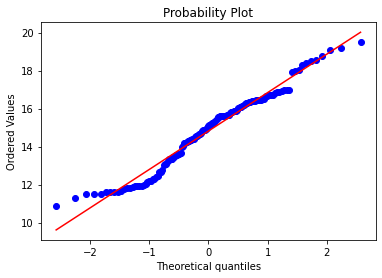

In [52]:
# Let's see how QQ plot is coming up
qqplot(patients_nonsmoke_tr)

The qq plot has improved after the transformation. We will continue with the further statistical testing.

#### Levene's test of homogeneity of variance

In [53]:
# Null Hypothesis (H0): The 2 sample group variances are equal.
levene_test(patients_smoke_tr,patients_nonsmoke_tr,center='mean', alpha=0.05)

p-value: 4.354257472528102e-46
Reject the Null Hypothesis


Levene’s test confirms that the variance of these two samples are not equal.Although the equal variance condition is not met, we still proceed with the t-test.

### Right Tail T-Test:
We now proceed to Right Tail T-Test- statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. A t-test is used to determine if the means of two sets of data are significantly different from each other. We chose t-test over Z-test as the population standard deviation is unknown and the sample size is small.

In [54]:
alpha = 0.05
w_stats, p_value = stats.ttest_ind(patients_smoke_tr,patients_nonsmoke_tr, equal_var=False)  
# equal_var is False- Welch test-doesnt assume variances to be equal.
# we can set the value of 'alternative' parameter to be "greater"
p_onetail=p_value/2
print("p-onetail:", p_onetail)
if p_onetail > alpha :
    print("We do not reject the null hypothesis")
else:
    print("Reject the Null Hypothesis")

p-onetail: 2.2562366279647446e-113
Reject the Null Hypothesis


### Hypothesis Testing 1 Conclusion: 
As p-value is less than alpha we do not have enough evidence to accept the Null hypothesis and conclude that medical cost charges for patients who smoke is greater than those who do not smoke.

### HYPOTHESIS TESTING 2:  BMI of female patients is different from that of males (T-test Two tailed).

Null Hypothesis (H0) : BMI of females is same as that of males. 

Alternate Hypothesis (HA) : BMI of females is different from that of males. 

Alpha (significance level)=0.05

We will conduct an independent t-test with 1. Two sample 2. Two Tailed 3. Independent Samples.

First we will verify the basic assumptions for Z-test. 
- The samples are drawn from a Gaussian distribution.
- The size of each sample is approximately equal.
- Homogeneity of Variances-The samples have the equal variance.

In [55]:
# gathering the 2 sample data to compare-
male=df[df['sex']=='male']
female=df[df['sex']=='female']

In [56]:
male_bmi=male['bmi']

In [57]:
male_bmi

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 581, dtype: float64

In [58]:
female_bmi=female['bmi']

In [59]:
female_bmi

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 610, dtype: float64

In [60]:
male_bmi.count(),female_bmi.count()

(581, 610)

In [61]:
female_bmi=female_bmi.sample(581)

In [62]:
male_bmi.count(),female_bmi.count()

(581, 581)

Sample sizes are now equal. We know test the other assumptions about gaussian distributions and the variances.

<AxesSubplot:xlabel='sex', ylabel='bmi'>

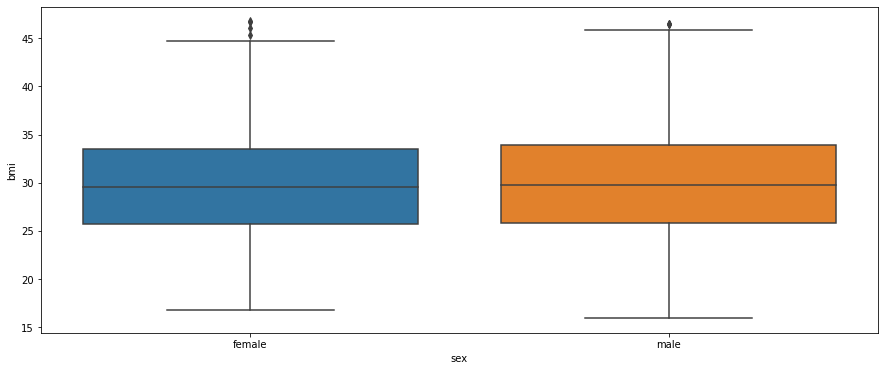

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(x='sex', y='bmi',data=df)


#### The median value of the BMI for male is lightly higher than the females. We observe the outliers in the female BMI values.

In [64]:
remove_outliers(female, ['bmi'], method='iqr')

0.6557377049180327% data detected as outlier.


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(      age     sex    bmi  children smoker     region      charges age_bins
 0      19  female  27.90         0    yes  southwest  16884.92400    18-28
 5      31  female  25.74         0     no  southeast   3756.62160    28-38
 6      46  female  33.44         1     no  southeast   8240.58960    38-48
 7      37  female  27.74         3     no  northwest   7281.50560    28-38
 9      60  female  25.84         0     no  northwest  28923.13692    58-68
 ...   ...     ...    ...       ...    ...        ...          ...      ...
 1332   52  female  44.70         3     no  southwest  11411.68500    48-58
 1334   18  female  31.92         0     no  northeast   2205.98080     0-18
 1335   18  female  36.85         0     no  southeast   1629.83350     0-18
 1336   21  female  25.80         0     no  southwest   2007.94500    18-28
 1337   61  female  29.07         0    yes  northwest  29141.36030    58-68
 
 [606 rows x 8 columns],
       age     sex    bmi  children smoker     region     cha

<AxesSubplot:xlabel='sex', ylabel='bmi'>

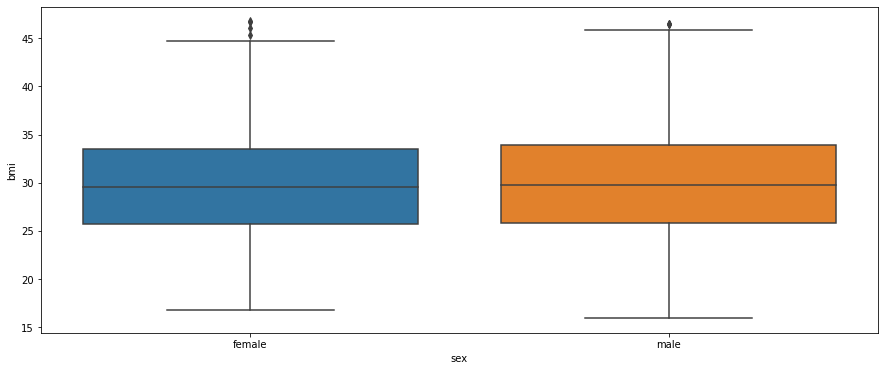

In [65]:
plt.figure(figsize=(15,6))
sns.boxplot(x='sex', y='bmi',data=df)

After outlier removal we confirm that the median value of the bmi value for females and males is approximately the same.

### Validating Assumptions

In [66]:
male_bmi.mean()

30.092779690189328

In [67]:
female_bmi.mean()

29.84669535283993

Text(0.5, 1.0, 'BMI for Male patients')

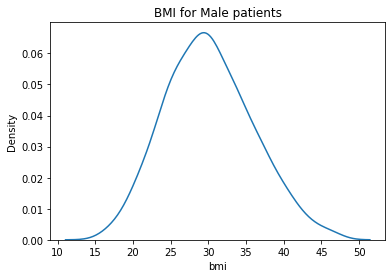

In [68]:
# Let's check the distributions first.
sns.kdeplot(x=male_bmi)
plt.title("BMI for Male patients")

Text(0.5, 1.0, 'BMI for Female patients')

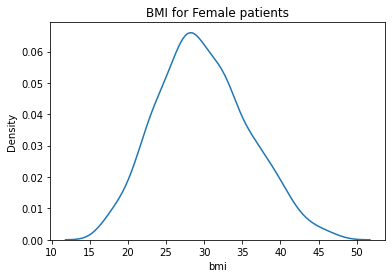

In [69]:
# Let's check the distributions first.
sns.kdeplot(x=female_bmi)
plt.title("BMI for Female patients")

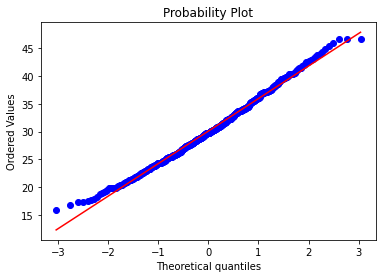

In [70]:
# Let's see how QQ plot is coming up
qqplot(male_bmi)

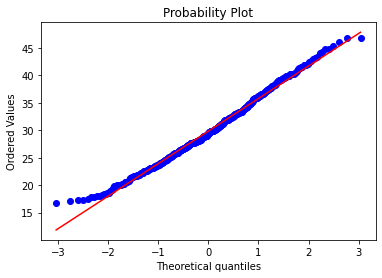

In [71]:
# Let's see how QQ plot is coming up
qqplot(female_bmi)

In [72]:
## As we can see the qqplot or the prob plot is meeting the normality requirements.

In [73]:
# Null Hypothesis (H0): Sample follows the normal distribution.

shapiro_wilk_test(male_bmi,0.05)

p-value: 0.007502040360122919
Reject the Null Hypothesis


In [74]:
# Null Hypothesis (H0): Sample follows the normal distribution.

shapiro_wilk_test(female_bmi,0.05)

p-value: 0.0013976540649309754
Reject the Null Hypothesis


As observed from above, the visual plots confirm that the samples follows normal distribution but the shapiro 
wilk test rejects this assumption.

### Levene_Test for homogeneity of variances

In [75]:
# H0: The 2 variances are equal.
levene_test(male_bmi,female_bmi,center='mean', alpha=0.05)

p-value: 0.61143931171615
We do not reject the null hypothesis


Hence the 2 variances are equal and we proceed with the two tailed T-Test below.

### Two Tail t-test for comparison of means.

In [76]:
alpha = 0.05
w_stats, p_value = stats.ttest_ind(male_bmi,female_bmi, equal_var=False)  
# equal_var is False- Welch test-doesnt assume variances to be equal.

print("p_value:", p_value)
if p_value > alpha :
    print("We fail to reject the null hypothesis")
else:
    print("Reject the Null Hypothesis")

p_value: 0.4757440529437661
We fail to reject the null hypothesis


### Hypothesis Testing 2 Conclusion: 

As p-value is less than alpha we FAIL TO REJECT the Null hypothesis and conclude that the bmi is the same for both male and female patients. In other words gender does not have any impact on the bmi.

### Hypothesis Testing 3: Does smoking population vary significantly different across different regions? 

Chi-Square Test or the test of independence is a non-parametric test performed on categorical variables (in this case region and smokers).

Here we will conduct the Chi-square test to check the variability within smokers in each region.

OBJECTIVE: Conduct Chi-square test to check relationship between two variables- region and smokers In other words if smoking is dependent on the region.

HYPOTHESIS FORMULATION:

- Null Hypothesis (HO): smoking patient population is significantly different across different regions.
- Alternate Hypothesis (Ha): smoking patient population is significantly different across different regions.
- Significance level(alpha)=5% (0.05)

Test: Chi-Square test as variables are categorical and we are checking for indepenedence/proportions.

Assumptions: The Chi-square test assumes that the expected value for each cell is five or higher. This assumption is easily met in our case.

In [77]:
df_chi=pd.crosstab(df["region"],df["smoker"])
df_chi

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,34
southwest,265,25


We compute the contigency table for Expected values assuming NULL hypothesis.

<AxesSubplot:xlabel='region'>

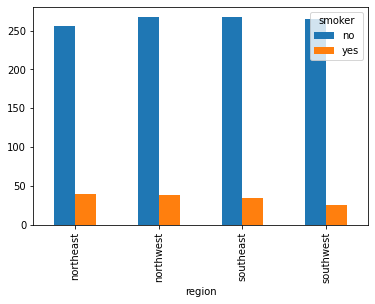

In [78]:
df_chi.plot(kind='bar')

In [79]:
ch2,pval,dof,exp_freq=stats.chi2_contingency(df_chi,correction=False)


In [80]:
pval

0.31791538258247426

P-Value Interpretation: As p-value is 0.335 which is GREATER than the significance level of 0.05, we  FAIL TO REJECT the Null hypothesis that smoking is independent of the region.

CONCLUSION: There is enough evidence to support the claim that proportion of smoking is similar across different regions.

### Hypothesis Testing 4: Check if the mean BMI of women with 0,1 and 2 children is the same.

Test: Here we will perform the Analysis of Variance (ANOVA) test which is a parametric statistical technique used to check if the means of two or more groups significantly differ from each other. In our case the groups are women with 0,1 and 2 number of children.

HYPOTHESIS FORMULATION:

- Null Hypothesis (H0):Mean BMI of women is SAME across all 3 groups.
- Alternate Hypothesis (Ha): Mean BMI of women is different.

Fundamental assumptions of ANOVA test:

- The observations/samples of the group follow a normal distribution.

- Homogeneity of variance across the groups

In [81]:
df[df['sex']=='female'].groupby('children')['bmi'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,268.0,29.889104,5.810244,17.290,25.8300,29.085,33.40000,44.745
1,147.0,29.727007,5.756836,16.815,25.8000,29.000,33.38500,46.090
2,106.0,29.834057,6.275766,17.195,25.0325,30.170,33.60625,46.700


- From above we observe that the mean value of BMI is approximately similar across the 3 groups.
- We will have to use 106 as the limiting factor for the samples used in the Anova test.

In [82]:
df_fem_sevlvl=df[df['sex']=='female'].loc[df[df['sex']=='female']['children']<=2]


In [83]:
df_fem_sevlvl.head()

,age,sex,bmi,children,smoker,region,charges,age_bins
0,19,female,27.90,0,yes,southwest,16884.92400,18-28
5,31,female,25.74,0,no,southeast,3756.62160,28-38
6,46,female,33.44,1,no,southeast,8240.58960,38-48
9,60,female,25.84,0,no,northwest,28923.13692,58-68
11,62,female,26.29,0,yes,southeast,27808.72510,58-68


In [84]:
df_fem_sevlvl['children'].value_counts()

0    268
1    147
2    106
Name: children, dtype: int64

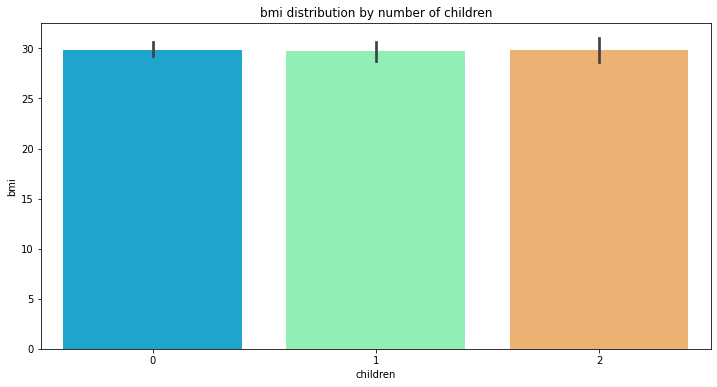

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(x='children',y='bmi',data=df_fem_sevlvl, palette='rainbow')
plt.title("bmi distribution by number of children")
plt.show()

<AxesSubplot:xlabel='children', ylabel='bmi'>

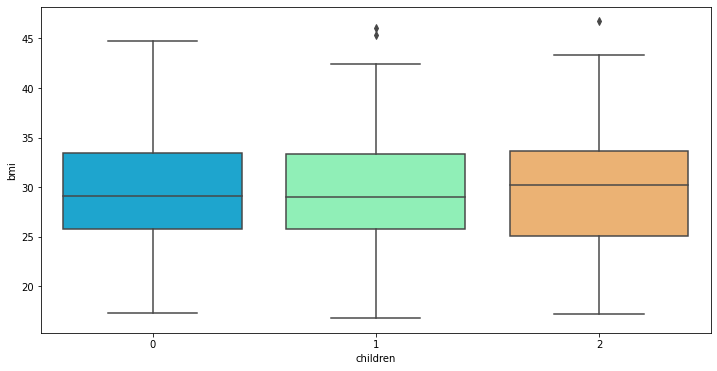

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x='children',y='bmi',data=df_fem_sevlvl, palette='rainbow')

- Median bmi for women with 2 children is the highest.
- Median bmi for 0 and 1 children is the same.
- We detect outlier presence with 1 and 2 children.

Text(0.5, 1.0, 'BMI distribution for female patients')

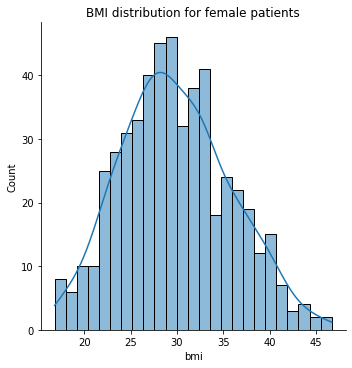

In [87]:
# Let's check for the normality of our data first.
sns.displot(df_fem_sevlvl['bmi'],bins=25,kde=True)
plt.title("BMI distribution for female patients")

Distribution appears to be slightly right skewed. We cross check this with qqplot and shapiro wilk statistical test for normality.

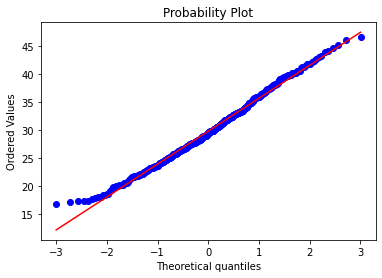

In [88]:
qqplot(df_fem_sevlvl['bmi'])

The qqplot appears to be more or less normal. Lets check Shapiro Wilk test next.

In [89]:
# NULL HYPOTHESIS (H0): The series follows the normal distribution.

shapiro_wilk_test(df_fem_sevlvl['bmi'],0.05)

p-value: 0.006624436005949974
Reject the Null Hypothesis


We conclude that the distribution is not normal and transformation will need to be applied to make our sample distribution more normal and remove the right skewness.

#### Levene's test of homogeneity of variance

In [90]:
# Test for Equal variances
# Null Hypothesis -H0: The BMI variances are equal across 0,1,2 number of children.
levene(df_fem_sevlvl[df_fem_sevlvl['children']==0]['bmi'].sample(106),df_fem_sevlvl[df_fem_sevlvl['children']==1]['bmi'].sample(106),df_fem_sevlvl[df_fem_sevlvl['children']==2]['bmi'].sample(106),center='mean',proportiontocut=0.05)

LeveneResult(statistic=0.8251752851995001, pvalue=0.4391030421571329)

As the p-value is 0.65 which is greater than 0.05, we FAIL to reject the Null Hypothesis and conclude that the samples have equal variances.

### ANOVA ONE WAY TEST: 

In [91]:
from scipy.stats import f_oneway
f_oneway(df_fem_sevlvl[df_fem_sevlvl['children']==0]['bmi'].sample(106),df_fem_sevlvl[df_fem_sevlvl['children']==1]['bmi'].sample(106),df_fem_sevlvl[df_fem_sevlvl['children']==2]['bmi'].sample(106))

F_onewayResult(statistic=0.36381259278833233, pvalue=0.6953130873054075)

#### Conclusion:  As the p_value from the ANOVA test is 0.81 which is greater than the alpha value of 0.05 we fail to reject the null hypothesis and conclude that the viral load among women is NOT significantly different across the groups with 0,1 and 2 children.

# Health_Insurance_Analysis Summary-

#### Key Observations from EDA, Univariate, Bivariate, Multivariate analysis and Hypothesis testing-

- Medical billing charges of smokers are greater than the non-smoker population.
- BMI of female patients does not statistically differ from that of male patients.
- There is no significant relationship between smoking and patient's region.
- The mean BMI of women with 0,1,and 2 children is the same. 
- Positive correlation between age and charges: The hospitalization charges increase with increase in the age and is maximum for the age group of 58-68 years.Also, women in the age_group of 23-25 yrs, 42-45 yrs have higher hospitalization charges compared to men, that could be related to child birth related factors.
- There is a positive correlation between BMI and Age.
- The hospital charges increase in proportion to the increase in the number of children.
- Patient population composition: 24% of patient population is in the age bracket of 18-28 yrs, followed by 48-58 yrs (21%) and 38-48 yrs (20%)- the 3 primary groups in our case study.

#### Business Recommendations:

- Special incentives should be extended to non-smokers in order to encourage them to avoid/quit smoking. These incentives can be in terms of assitional annual health check up benefits, cash back offers, gift cards, free weight loss plans etc. 

- Actionables for the following patient age group:

a) 18-28 years: Extend childbirth plans, health and wellness, mental health, fitness consultation offers.
b) 38-48 years: Extend preventive health packages along with lifestyle and weight loss consultation.
c) 48-58 yrs: Extend full body screening packages including bone health checkups.
d) 58-68 yrs: As the hospitalization charges is maximum for the age group of 58-68 years, one recommendation is to offer remote health monitoring services to the patients in their home using IOT technologies to detect falls, vital health stats and mental health. 

- Fitness offers to be extended to patients above 28 years as we observed increase in BMI with increase in age.    
- Women Health- Promote women health screening plans to minimize the hospitalization during and post child birth.
- Extend diagnostic packages for preventive health, so that patients can be treated at low severity level stage and prevent extended hospitalization at high severity levels.
